In [142]:
import pandas as pd
import numpy as np
from sklearn import neighbors, linear_model, model_selection, metrics
import seaborn as sns

In [143]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

In [144]:
df = pd.read_csv('preprocessed_data_craigslist.csv').drop(
    ['Unnamed: 0', 'text', 'url', 'title', 'date', 'days'], axis=1).drop_duplicates(subset=None, keep='first', inplace=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3190 entries, 0 to 3310
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 3190 non-null   float64
 1   location              3190 non-null   object 
 2   numimage              3190 non-null   float64
 3   condition             3190 non-null   object 
 4   makemanufacturer      3190 non-null   float64
 5   modelnamenumber       3190 non-null   float64
 6   bicycleframematerial  3190 non-null   object 
 7   bicycletype           3190 non-null   object 
 8   braketype             3190 non-null   object 
 9   electricassist        3190 non-null   float64
 10  framesize             3190 non-null   object 
 11  handlebartype         3190 non-null   object 
 12  suspension            3190 non-null   float64
 13  wheelsize             3190 non-null   object 
 14  sizedimensions        3190 non-null   int64  
 15  serialnumber         

In [145]:
df = df[(10 < df.price) & (df.price < 1000)
        ].reset_index().drop(['index'], axis=1)
df

,price,location,numimage,condition,makemanufacturer,modelnamenumber,bicycleframematerial,bicycletype,braketype,electricassist,framesize,handlebartype,suspension,wheelsize,sizedimensions,serialnumber,paintcolor,yearmanufactured
0,30.0,auburn,6.0,4,1.0,1.0,unknown,unknown,unknown,0.0,unknown,unknown,0.0,unknown,0,0,0,0
1,112.0,auburn,4.0,4,1.0,1.0,unknown,track,unknown,0.0,unknown,unknown,0.0,unknown,0,0,0,0
2,167.0,auburn,7.0,4,1.0,0.0,unknown,track,unknown,0.0,unknown,unknown,0.0,unknown,0,0,0,0
3,125.0,auburn,9.0,3,1.0,1.0,aluminum,mountain,special,0.0,2,special,1.0,26,0,0,0,0
4,75.0,auburn,0.0,1,0.0,0.0,aluminum,mountain,mechanical,0.0,unknown,unknown,0.0,unknown,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,75.0,seattle,2.0,unknown,1.0,1.0,unknown,unknown,unknown,0.0,3,unknown,0.0,26,0,0,0,0
2426,100.0,seattle,2.0,2,1.0,1.0,aluminum,mountain,mechanical,0.0,3,unknown,0.0,24,0,1,0,0
2427,110.0,seattle,10.0,3,1.0,0.0,unknown,unknown,unknown,0.0,unknown,unknown,0.0,unknown,0,0,0,0
2428,50.0,seattle,3.0,4,0.0,0.0,unknown,unknown,unknown,0.0,unknown,unknown,0.0,unknown,0,0,0,0


In [146]:
pd.get_dummies(df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Columns: 111 entries, price to wheelsize_unknown
dtypes: float64(6), int64(4), uint8(101)
memory usage: 429.6 KB


In [147]:
X = pd.get_dummies(df.drop(columns=['price']))
display(X)
y = df.price

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25,random_state=52)

,numimage,makemanufacturer,modelnamenumber,electricassist,suspension,sizedimensions,serialnumber,paintcolor,yearmanufactured,location_anchorage,...,wheelsize_16,wheelsize_18,wheelsize_20,wheelsize_24,wheelsize_25,wheelsize_26,wheelsize_27,wheelsize_28,wheelsize_29,wheelsize_unknown
0,6.0,1.0,1.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4.0,1.0,1.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,7.0,1.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9.0,1.0,1.0,0.0,1.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,2.0,1.0,1.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2426,2.0,1.0,1.0,0.0,0.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2427,10.0,1.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2428,3.0,0.0,0.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Preprocessing (tentative de scaling)

In [148]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train)

x_train_scaled = scaler.transform(X_train)
X_train = pd.DataFrame(x_train_scaled, columns=X_train.columns)

x_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(x_test_scaled, columns=X_test.columns)

X_train, X_test

(      numimage  makemanufacturer  modelnamenumber  electricassist  suspension  \
 0     0.208333               0.0              0.0             0.0         0.0   
 1     0.250000               0.0              0.0             0.0         0.0   
 2     0.500000               1.0              1.0             0.0         1.0   
 3     0.166667               1.0              1.0             0.0         0.0   
 4     0.458333               0.0              0.0             0.0         0.0   
 ...        ...               ...              ...             ...         ...   
 1817  0.208333               0.0              1.0             0.0         0.0   
 1818  0.083333               0.0              0.0             0.0         0.0   
 1819  0.416667               1.0              1.0             0.0         0.0   
 1820  0.291667               0.0              0.0             0.0         0.0   
 1821  0.250000               1.0              1.0             0.0         0.0   
 
       sizedim

# Linear Regression

In [149]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(X_train, y_train)

LinearRegression()

In [150]:
linear_regression.intercept_

1549706783524134.5

In [151]:
linear_regression.coef_

array([ 1.56593337e+02, -4.66315308e+00,  5.48615277e+01,  3.29410290e+02,
       -6.92344685e+01, -9.87331541e+01, -3.72457064e+01,  1.74453787e+02,
       -1.01798045e+02, -7.00815512e+13, -7.00815512e+13, -7.00815512e+13,
       -7.00815512e+13, -7.00815512e+13, -7.00815512e+13, -7.00815512e+13,
       -7.00815512e+13, -7.00815512e+13, -7.00815512e+13, -7.00815512e+13,
       -7.00815512e+13, -7.00815512e+13, -7.00815512e+13, -7.00815512e+13,
       -7.00815512e+13, -7.00815512e+13, -7.00815512e+13, -7.00815512e+13,
       -7.00815512e+13, -7.00815512e+13, -7.00815512e+13, -7.00815512e+13,
       -7.00815512e+13, -7.00815512e+13, -7.00815512e+13, -7.00815512e+13,
       -7.00815512e+13, -7.00815512e+13, -7.00815512e+13, -7.00815512e+13,
       -7.00815512e+13, -7.00815512e+13, -7.00815512e+13, -7.00815512e+13,
       -7.00815512e+13, -7.00815512e+13, -7.00815512e+13, -7.00815512e+13,
       -7.00815512e+13, -7.00815512e+13, -7.00815512e+13, -7.00815512e+13,
       -7.00815512e+13, -

In [152]:
y_pred = linear_regression.predict(X_test)
print('Coefficients: \n', linear_regression.coef_, len(linear_regression.coef_))
# The mean squared error
print("RMSE: %.2f" %
      sqrt(np.mean((linear_regression.predict(X_test) - y_test) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linear_regression.score(X_test, y_test))

Coefficients: 
 [ 1.56593337e+02 -4.66315308e+00  5.48615277e+01  3.29410290e+02
 -6.92344685e+01 -9.87331541e+01 -3.72457064e+01  1.74453787e+02
 -1.01798045e+02 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13
 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13
 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13
 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13
 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13
 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13
 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13
 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13
 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13
 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13
 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13
 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13
 -7.00815512e+13 -7.00815512e+13 -7.00815512e+13  3.61935239e+13
  3.61935

In [153]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred = df_pred[(df_pred['Predicted'] > 20) & (df_pred['Predicted'] < 2000)]
df_pred

,Actual,Predicted
1693,100.0,261.00
314,42.0,267.00
1602,120.0,139.25
1167,150.0,209.50
793,300.0,187.25
...,...,...
802,15.0,185.00
2259,80.0,231.50
1987,250.0,283.00
94,200.0,84.50


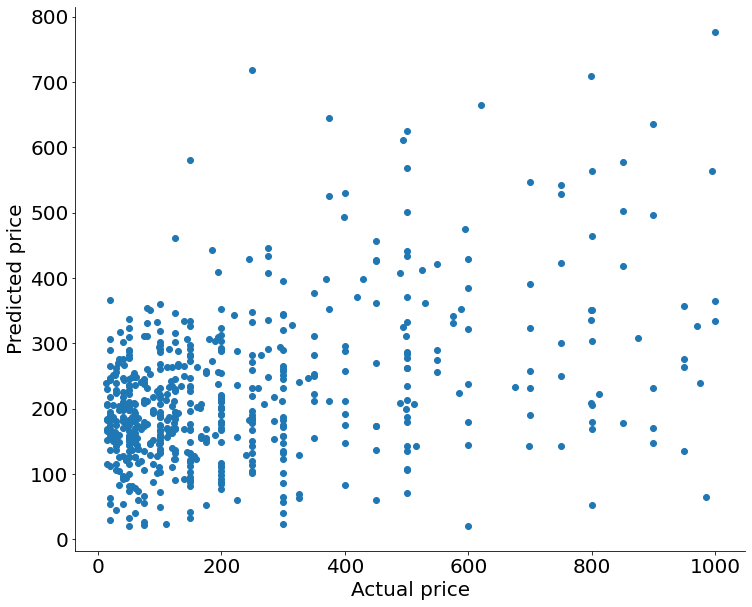

In [154]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 10))
plt.scatter(df_pred['Actual'], df_pred['Predicted'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Actual price', fontsize=20)
plt.ylabel('Predicted price', fontsize=20)

sns.despine()

<AxesSubplot:>

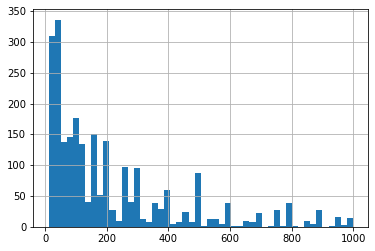

In [155]:
df['price'].hist(bins=50)

In [156]:
#import statsmodels.api as sm
# X_train = sm.add_constant(X_train) # adding a constant
# X_test = sm.add_constant(X_test) # adding a constant
#
#
#model = sm.OLS(y_train, X_train).fit()
#predictions = model.predict(X_test)
#
#print_model = model.summary()
# print(print_model)

# KNN

In [157]:
rmse_val = []  # to store rmse values for different k
for K in range(40):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model.fit(X_train, y_train)  # fit the model
    pred = model.predict(X_test)  # make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred))  # calculate rmse
    rmse_val.append(error)  # store rmse values
fit_df = pd.DataFrame({'k': range(1, 41), 'RMSE': rmse_val}).set_index('k')
display(fit_df)
best_k = int(fit_df.idxmin())
best_k

,RMSE
k,
1,247.505798
2,220.311033
3,215.493518
4,207.256468
5,204.998299
6,205.574074
7,206.083987
8,205.374524
9,205.221261


13

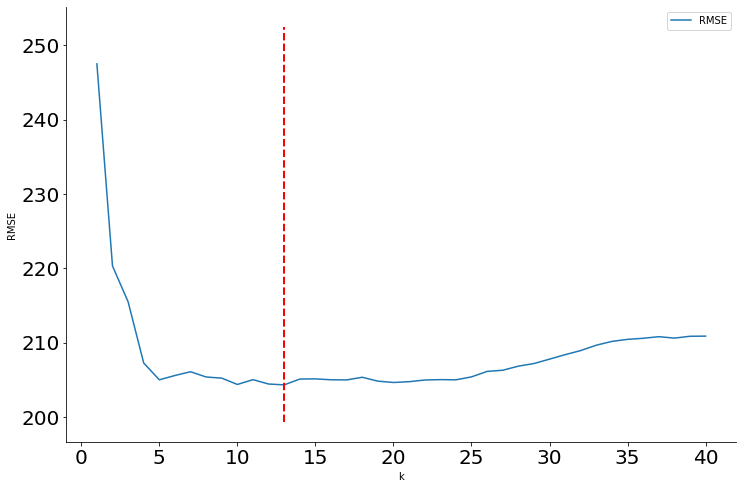

In [158]:
fit_df.plot(ylabel='RMSE', figsize=[12, 8], fontsize=20)
plt.plot([best_k, best_k], [fit_df['RMSE'].min()-5, fit_df['RMSE'].max()+5], color='red',
         linestyle='dashed', linewidth=2)

sns.despine()

In [159]:
model = neighbors.KNeighborsRegressor(n_neighbors=best_k)
model.fit(X_train, y_train)  # fit the model
pred_KNN = model.predict(X_test)

In [160]:
df_pred_KNN = pd.DataFrame({'Actual': y_test, 'Predicted': pred_KNN})
df_pred_KNN = df_pred_KNN[(df_pred_KNN['Predicted'] > 20) & (
    df_pred_KNN['Predicted'] < 2000)]
df_pred_KNN

,Actual,Predicted
1693,100.0,140.307692
314,42.0,141.538462
1602,120.0,181.923077
1167,150.0,142.230769
793,300.0,252.615385
...,...,...
2259,80.0,194.692308
1102,15.0,41.153846
1987,250.0,228.615385
94,200.0,198.384615


In [161]:
# Linear Regression vs KNN
print('RMSE for linear regression : ', sqrt(
    mean_squared_error(y_test, y_pred)))
print('RMSE for KNN with best K : ', sqrt(
    mean_squared_error(y_test, pred_KNN)))

RMSE for linear regression :  208.47289286627384
RMSE for KNN with best K :  204.31542220550105


# Random Forest Regression

In [162]:
#from sklearn.model_selection import GridSearchCV
#
# grid = {
#    'n_estimators': [200,300,400,500],
#    'max_features': ['sqrt','log2'],
#    'max_depth' : [3,4,5,6,7],
#    'random_state' : [52]
# }
# Grid Search function
#CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
#CV_rfr.fit(X_train, y_train)
#

In [163]:
# CV_rfr.best_params_

# Output is :

'''
{'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 500,
 'random_state': 52}
 '''

"\n{'max_depth': 7,\n 'max_features': 'sqrt',\n 'n_estimators': 500,\n 'random_state': 52}\n "

In [164]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, max_features='sqrt',
                           max_depth=7, random_state=52).fit(X_train, y_train)
pred_RF = rf.predict(X_test)
mse = mean_squared_error(y_test, pred_RF)
rmse = mse**.5
print(rmse)

210.06757639593758


In [165]:
df_pred_RF = pd.DataFrame({'Actual': y_test, 'Predicted': pred_RF})
df_pred_RF = df_pred_RF[(df_pred_RF['Predicted'] > 20)
                        & (df_pred_RF['Predicted'] < 2000)]
df_pred_RF

,Actual,Predicted
1693,100.0,223.390390
314,42.0,213.423571
1602,120.0,208.600530
1167,150.0,169.145584
793,300.0,187.511166
...,...,...
2259,80.0,175.419692
1102,15.0,131.656509
1987,250.0,248.526151
94,200.0,175.249547


# Sum-up

In [166]:
# Linear Regression vs KNN vs RF
print('RMSE for linear regression : ', sqrt(
    mean_squared_error(y_test, y_pred)))
print('RMSE for KNN with best K : ', sqrt(
    mean_squared_error(y_test, pred_KNN)))
print('RMSE for RF with best params : ', sqrt(
    mean_squared_error(y_test, pred_RF)))


RMSE for linear regression :  208.47289286627384
RMSE for KNN with best K :  204.31542220550105
RMSE for RF with best params :  210.06757639593758


In [167]:
df_pred_sum_up = pd.DataFrame({'Actual': y_test,'Predicted with Linear Regression':y_pred,'Predicted with KNN k ='+str(best_k):pred_KNN,'Predicted with Random Forest': pred_RF})
average_pred = df_pred_sum_up.drop("Actual",axis=1).mean(axis=1)
df_pred_sum_up['Average']=average_pred

df_pred_sum_up = df_pred_sum_up[(df_pred_sum_up['Predicted with Linear Regression'] > 20)
                        & (df_pred_sum_up['Predicted with Linear Regression'] < 2000)]
df_pred_sum_up = df_pred_sum_up[(df_pred_sum_up['Predicted with KNN k ='+str(best_k)] > 20)
                        & (df_pred_sum_up['Predicted with KNN k ='+str(best_k)] < 2000)]
df_pred_sum_up = df_pred_sum_up[(df_pred_sum_up['Predicted with Random Forest'] > 20)
                        & (df_pred_sum_up['Predicted with Random Forest'] < 2000)]

df_pred_sum_up.reset_index().drop('index',axis=1)

,Actual,Predicted with Linear Regression,Predicted with KNN k =13,Predicted with Random Forest,Average
0,100.0,261.00,140.307692,223.390390,208.232694
1,42.0,267.00,141.538462,213.423571,207.320677
2,120.0,139.25,181.923077,208.600530,176.591202
3,150.0,209.50,142.230769,169.145584,173.625451
4,300.0,187.25,252.615385,187.511166,209.125517
...,...,...,...,...,...
585,15.0,185.00,73.846154,170.467446,143.104533
586,80.0,231.50,194.692308,175.419692,200.537333
587,250.0,283.00,228.615385,248.526151,253.380512
588,200.0,84.50,198.384615,175.249547,152.711388


In [168]:
print('RMSE for Average : ', sqrt(
    mean_squared_error(y_test, average_pred)))

RMSE for Average :  201.59486992367175


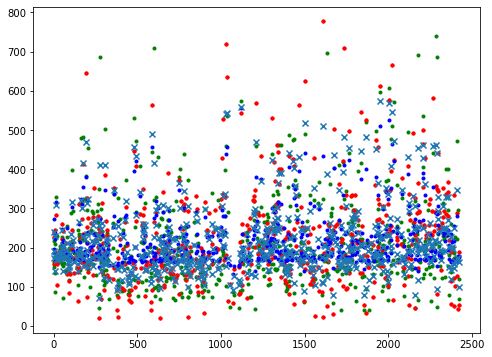

In [169]:
x = df_pred_sum_up.index

fig = plt.figure(figsize=(8,6))  #setting the figure size
plt.scatter(x, df_pred_sum_up['Predicted with Linear Regression'],marker='.',color='r') 

plt.scatter(x, df_pred_sum_up['Predicted with KNN k ='+str(best_k)],marker='.',color='g') 
plt.scatter(x, df_pred_sum_up['Predicted with Linear Regression'],marker='.',color='r') 
plt.scatter(x, df_pred_sum_up['Predicted with Random Forest'],marker='.',color='b') 
plt.scatter(x,df_pred_sum_up['Average'],marker='x')

plt.show()